# Load RData

If it throws the error "module 'pandas' has no attribute 'core'", close notebook and repopen.
https://www.py4u.net/discuss/16084

In [1]:
import pyreadr

pbmc_2 = pyreadr.read_r('../data/PBMC_protocol.RData')


# Load dataset pbmc1

In [2]:
# features x observations
ge_SM2_fd = pbmc_2["SM2.pbmc1.data"].values
ge_10xv2_fd = pbmc_2["X10v2.pbmc1.data"].values
ge_CL = pbmc_2["CL2.pbmc1.data"].values
ge_DR = pbmc_2["DR2.pbmc1.data"].values
ge_iD = pbmc_2["iD2.pbmc1.data"].values
ge_SW_fd = pbmc_2["SW2.pbmc1.data"].values

In [3]:
lb_SM2_fd = pbmc_2["SM2.pbmc1.labels"]["SM2.pbmc1.labels"].values
lb_10xv2_fd = pbmc_2["X10v2.pbmc1.labels"]["X10v2.pbmc1.labels"].values
lb_CL = pbmc_2["CL2.pbmc1.labels"]["CL2.pbmc1.labels"].values
lb_DR = pbmc_2["DR2.pbmc1.labels"]["DR2.pbmc1.labels"].values
lb_iD = pbmc_2["iD2.pbmc1.labels"]["iD2.pbmc1.labels"].values
lb_SW_fd = pbmc_2["SW2.pbmc1.labels"]["SW2.pbmc1.labels"].values

Combine all labels from all datasets.

In [4]:
import numpy as np

lb_all_1 = np.concatenate((np.concatenate((np.concatenate((np.concatenate((np.concatenate((lb_SM2_fd, lb_10xv2_fd)), lb_CL)), lb_DR)), lb_iD)), lb_SW_fd))

Here, you can check the contents & size for all datasets or for specific datasates

In [5]:
y_check_data = lb_all_1

16570
Counter({'Cytotoxic T cell': 5766, 'CD14+ monocyte': 3443, 'CD4+ T cell': 3419, 'B cell': 1950, 'Megakaryocyte': 634, 'Natural killer cell': 624, 'CD16+ monocyte': 461, 'Dendritic cell': 171, 'Plasmacytoid dendritic cell': 102})


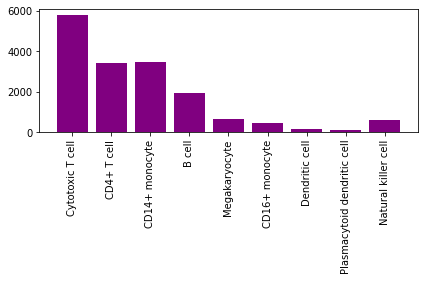

In [6]:
from ctc_utils.functions import plot_cell_type_counts
from collections import Counter

print(len(y_check_data))
print(Counter(y_check_data))
plot_cell_type_counts(y_check_data)

# Load dataset pbmc2

In [7]:
# features x observations
ge_SM2 = pbmc_2["SM2.pbmc2.data"].values
ge_10xv2 = pbmc_2["X10v2.pbmc2.data"].values
ge_CL2 = pbmc_2["CL2.pbmc2.data"].values
ge_DR2 = pbmc_2["DR2.pbmc2.data"].values
ge_iD2 = pbmc_2["iD2.pbmc2.data"].values
ge_SW2 = pbmc_2["SW2.pbmc2.data"].values



In [8]:
lb_SM2 = pbmc_2["SM2.pbmc2.labels"]["SM2.pbmc2.labels"].values
lb_10xv2 = pbmc_2["X10v2.pbmc2.labels"]["X10v2.pbmc2.labels"].values
lb_CL2 = pbmc_2["CL2.pbmc2.labels"]["CL2.pbmc2.labels"].values
lb_DR2 = pbmc_2["DR2.pbmc2.labels"]["DR2.pbmc2.labels"].values
lb_iD2 = pbmc_2["iD2.pbmc2.labels"]["iD2.pbmc2.labels"].values
lb_SW2 = pbmc_2["SW2.pbmc2.labels"]["SW2.pbmc2.labels"].values


Combine labels from all datasets

In [9]:
import numpy as np

lb_all_2 = np.concatenate((np.concatenate((np.concatenate((np.concatenate((np.concatenate((lb_SM2, lb_10xv2)), lb_CL2)), lb_DR2)), lb_iD2)), lb_SW2))

Here, you can check the contents & size for all datasets or for specific datasates

In [10]:
y_check_data = lb_all_2

11183
Counter({'CD4+ T cell': 3012, 'B cell': 2724, 'Cytotoxic T cell': 2343, 'CD14+ monocyte': 1753, 'Natural killer cell': 747, 'CD16+ monocyte': 245, 'Dendritic cell': 224, 'Megakaryocyte': 73, 'Plasmacytoid dendritic cell': 62})


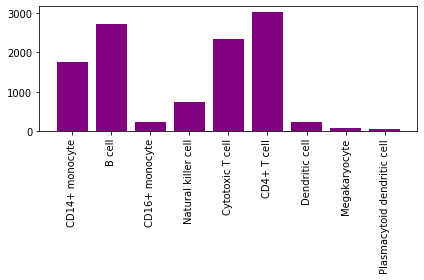

In [11]:
from ctc_utils.functions import plot_cell_type_counts
from collections import Counter

print(len(y_check_data))
print(Counter(y_check_data))
plot_cell_type_counts(y_check_data)


# Combine datasets of same techniques

In [12]:

ge_SM2_comb = np.concatenate((ge_SM2, ge_SM2_fd), axis = 1)
ge_10xv2_comb = np.concatenate((ge_10xv2, ge_10xv2_fd), axis = 1)
ge_CL_comb = np.concatenate((ge_CL2, ge_CL), axis = 1)
ge_DR_comb = np.concatenate((ge_DR, ge_DR2), axis = 1)
ge_iD_comb = np.concatenate((ge_iD, ge_iD2), axis = 1)
ge_SW_comb = np.concatenate((ge_SW2, ge_SW_fd), axis = 1)


In [13]:
lb_SM2_comb = np.concatenate((lb_SM2, lb_SM2_fd))
lb_10xv2_comb = np.concatenate((lb_10xv2, lb_10xv2_fd))
lb_CL_comb = np.concatenate((lb_CL2, lb_CL))
lb_DR_comb = np.concatenate((lb_DR, lb_DR2))
lb_iD_comb = np.concatenate((lb_iD, lb_iD2))
lb_SW_comb = np.concatenate((lb_SW2, lb_SW_fd))

# Select training and test set

In [16]:
x_train= ge_CL_comb.T
y_train = lb_CL_comb
x_test = ge_10xv2_comb.T
y_test = lb_10xv2_comb

# Feature selection

In [17]:
from classifiers.LinearSVC import lsvc
from classifiers.hierarchical_classifier import hierarchical_classifier
from sklearn.feature_selection import VarianceThreshold

#Feature selection
sel = VarianceThreshold(threshold=0.16)
x_train = sel.fit_transform(x_train)
x_test = sel.transform(x_test)


model, acc = lsvc(x_train, y_train, x_test, y_test)

[Pipeline] ................ (step 1 of 2) Processing fa, total=   2.7s
[Pipeline] ................. (step 2 of 2) Processing m, total=   0.1s


/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


# Classification

LinearSVC classifier

In [18]:
model, acc = lsvc(x_train, y_train, x_test, y_test)

[Pipeline] ................ (step 1 of 2) Processing fa, total=   2.6s
[Pipeline] ................. (step 2 of 2) Processing m, total=   0.2s


/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Plot confusion matrix and print f1 score

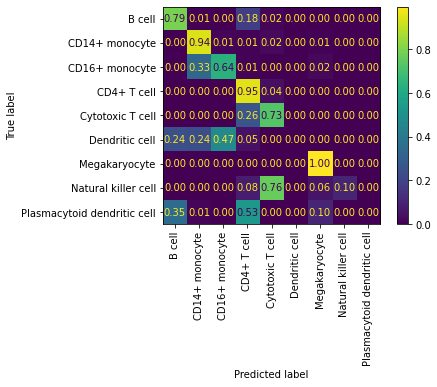

0.8053062725198212


In [19]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
plot_confusion_matrix(model,  x_test, y_test, xticks_rotation = "vertical", normalize = "true", values_format = ".2f")  
plt.show()
print(acc)